<a href="https://colab.research.google.com/github/Haamid219/NIDS/blob/main/feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top features by Mutual Information:
 Flow Packets/s          1.525247
Fwd Packets/s            1.499966
 Bwd Packets/s           1.445991
 Average Packet Size     1.381226
 Packet Length Mean      1.371480
                           ...   
 Active Std              0.000000
 Active Max              0.000000
 Fwd Avg Packets/Bulk    0.000000
Idle Mean                0.000000
Fwd Avg Bytes/Bulk       0.000000
Length: 78, dtype: float64

Feature Importance by Random Forest (All Features):
 Destination Port           0.072987
Init_Win_bytes_forward      0.057398
 Init_Win_bytes_backward    0.045648
 Bwd Packets/s              0.034329
Flow Bytes/s                0.033734
                              ...   
 Bwd URG Flags              0.000000
 Fwd URG Flags              0.000000
 Bwd PSH Flags              0.000000
Fwd PSH Flags               0.000000
 Idle Min                   0.000000
Length: 78, dtype: float64


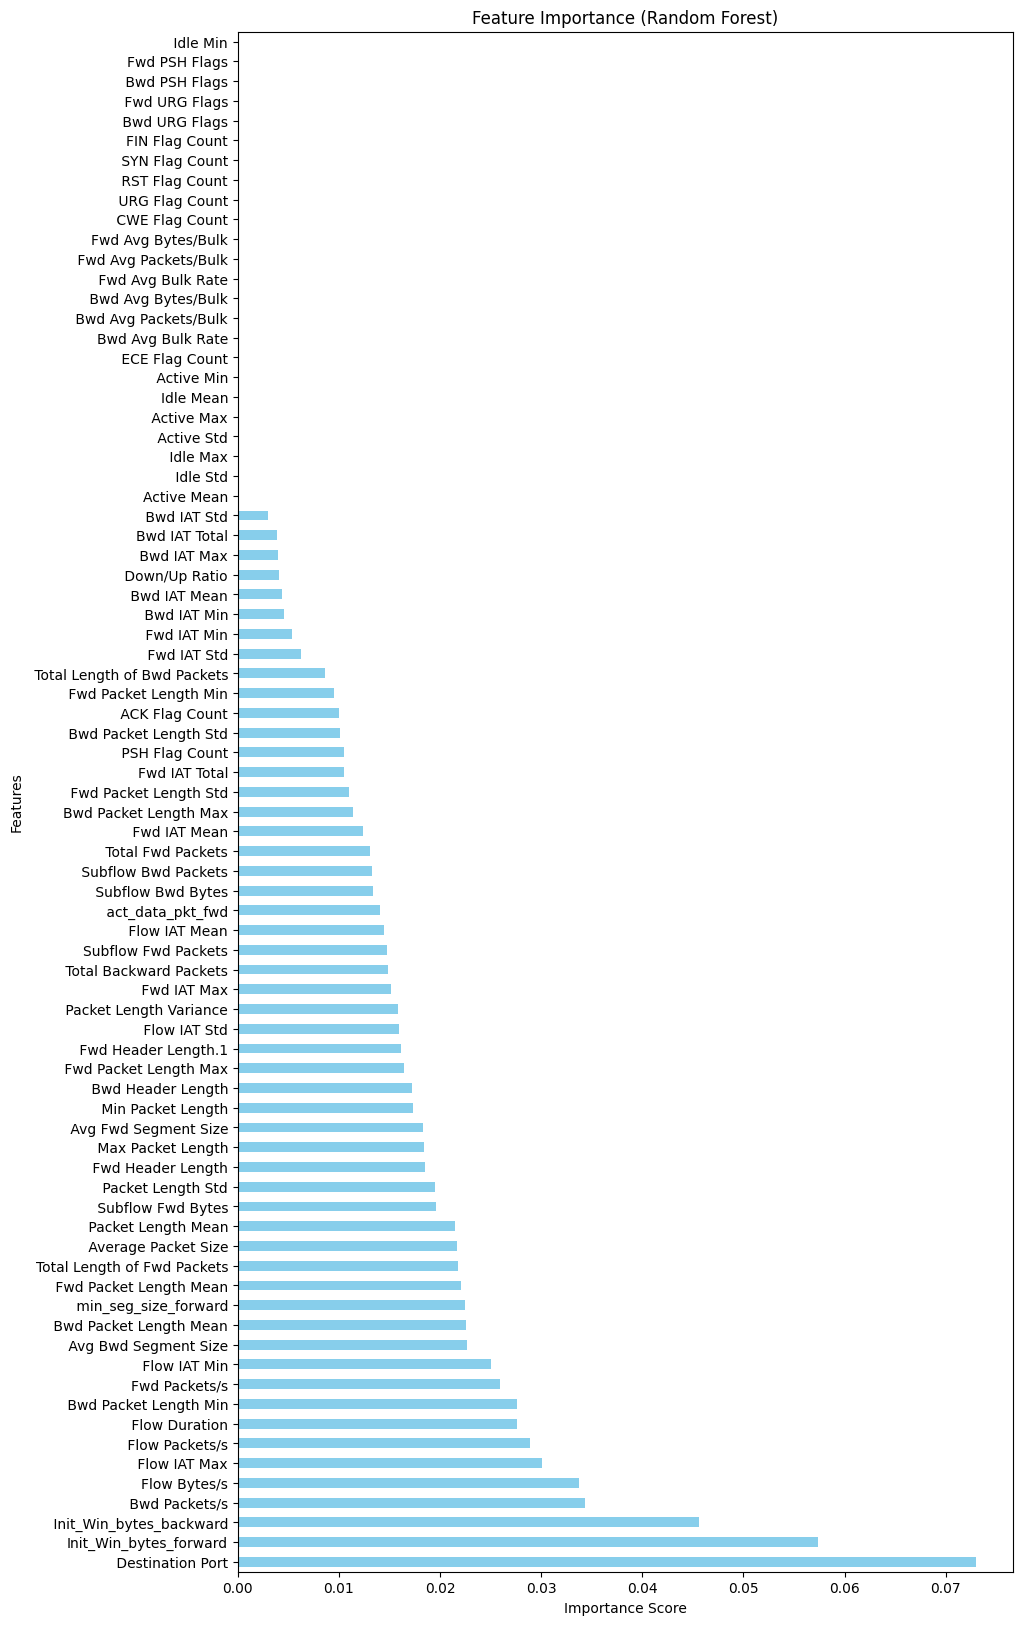

In [9]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('balanced_CIC_IDS2017_with_SMOTE.csv')
X = data.drop(columns=[' Label'])
y = data[' Label']

# Step 1: Mutual Information for initial filtering
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Step 2: Random Forest for feature importance on all features
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)  # Train on all features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print top features from Mutual Information (for comparison)
print("Top features by Mutual Information:")
print(mi_scores.head(79))  # Adjust to see top N features by mutual information

# Print all features by Random Forest Importance
print("\nFeature Importance by Random Forest (All Features):")
print(feature_importances)

# Step 3: Plot feature importances
plt.figure(figsize=(10, 20))
feature_importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
